<h3> Use Real Phenotypes on 2706 training samples, July 16th </h3>
instead of using simulated phenotypes. 

In [6]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import ELBO_plot
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

<h5> For chr22, shuffled 500 SNPs  </h5>

In [31]:
# real_phe for 2706 samples
real_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_CM_chr22",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
)

real_gdl.perform_gwas()
real_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/shuffle_500snps.sumstats", sep="\t", index=False
)
real_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')


> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [32]:
v = vp.VIPRS(real_gdl, fix_params={'pi': 0.001, 'sigma_epsilon': 0.999}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 1/1000 [00:00<10:35,  1.57it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 2: ELBO dropped from -3838.785961 to -3838.788377.
  
  0%|          | 2/1000 [00:01<10:49,  1.54it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 3: ELBO dropped from -3838.788377 to -3838.790664.
  
  0%|          | 3/1000 [00:01<10:26,  1.59it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 4: ELBO dropped from -3838.790664 to -3838.792939.
  
  0%|          | 4/1000 [00:02<10:14,  1.62it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 5: ELBO dropped from -3838.792939 to -3838.795202.
  
  0%|          | 5/1000 [00:03<10:07,  1.64it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykern

> Final ELBO: -3838.810714
> Estimated heritability: 0.000968
> Estimated proportion of causal variants: 0.001000


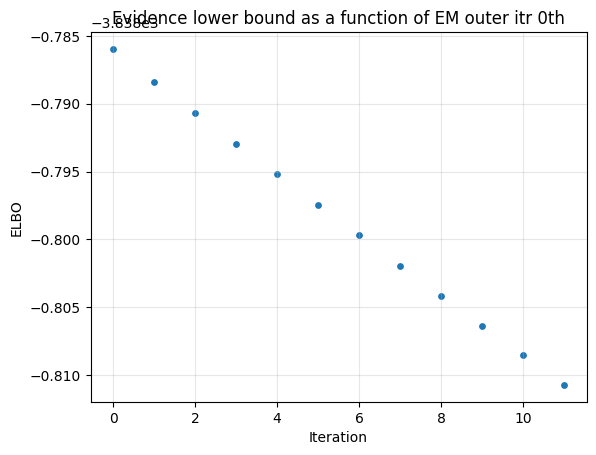

In [33]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_500SNPs_chr22.png",itr=0)

In [34]:
pred = v.predict()

> Generating polygenic scores...


In [35]:
pred.shape
real_gdl.to_phenotype_table()

,FID,IID,phenotype
0,0,1000,1.800000
1,0,2000,2.130000
2,0,3000,2.010000
3,0,4000,2.540000
4,0,5000,-0.150000
...,...,...,...
2701,0,3061000,2.370120
2702,0,3062000,3.914104
2703,0,3064000,4.955841
2704,0,3065000,1.029280


In [54]:
v.get_heritability()
v.get_proportion_causal()
v.get_sigma_beta()

5.297191918397351e-05

In [55]:
v.get_average_effect_size_variance()

5.297191918397351e-08

In [61]:
a = v.history['ELBO']
a

[-3838.785960800183,
 -3838.78837708301,
 -3838.790664084688,
 -3838.7929390250715,
 -3838.795201960886,
 -3838.7974529867947,
 -3838.7996921964577,
 -3838.801919682555,
 -3838.804135536801,
 -3838.8063398499557,
 -3838.8085327118383,
 -3838.81071421134]

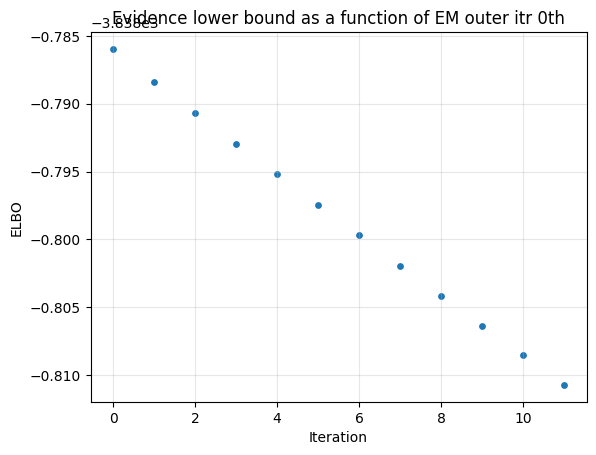

In [60]:
ELBO_plot(a, "Real_phe_expr/ELBO_plots/real_500SNPs_chr22.png",itr=0)